In [ ]:
## packages

import os as Trfic_P1
import tensorflow as Trfic_P2
from tensorflow.keras import layers as Trfic_P3
from tensorflow.keras import models as Trfic_P4
from tensorflow.keras.callbacks import EarlyStopping as Trfic_P5
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Trfic_P6
from tensorflow.keras.preprocessing import image_dataset_from_directory as Trfic_P7
import matplotlib.pyplot as Trfic_P8
from sklearn.metrics import classification_report as Trfic_P9
import numpy as Trfic_P10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Trfic_ImagRT = '/content/drive/MyDrive/New Code/Traffic_JPG_images'

In [ ]:
Trfic_s = 90  # Random seed
Trfic_i = (224, 224)  # Image size for resizing
Trfic_ii = 0.2  # Validation split value

# Data Augmentation process

Using methods are # Rotation angle range, # Vertical shift, # Shear transformations, # Random vertical shift, # Random horizontal flip, # Fill in pixels

In [ ]:
Trfic_Trn = Trfic_P6(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Trfic_Vl = Trfic_P6(
    rescale=1./255  # Only normalize for validation data
)

In [ ]:
# Apply the augmentation to tha data

Trfic_Tr_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='training',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Trfic_Vl_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='validation',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Found 8170 files belonging to 5 classes.
Using 6536 files for training.
Found 8170 files belonging to 5 classes.
Using 1634 files for validation.


# Design a CNN model

In [ ]:
# CNN Model Architecture
def Trfic_CNN(Trfic_OTZ):

  Trfic_ML = Trfic_P4.Sequential([
      Trfic_P3.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(64, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(128, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Flatten(),
      Trfic_P3.Dense(128, activation='relu'),
      Trfic_P3.Dense(5, activation='softmax')
  ])

  # Model Compilation
  Trfic_ML.compile(optimizer=Trfic_OTZ, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  Trfic_M_h = Trfic_ML.fit( Trfic_Tr_aug, epochs=20, validation_data=Trfic_Vl_aug)

  # Evaluate on the validation data
  val_Trfic_loss, val_Trfic_acc = Trfic_ML.evaluate(Trfic_Vl_aug)
  print(f" Validation data Loss: {val_Trfic_loss:.2f}")
  print(f" Validation data Accuracy: {val_Trfic_acc:.2f}")

  # Plot training and validation accuracy & LOSS
  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['accuracy'], label='Train Acc')
  Trfic_P8.plot(Trfic_M_h.history['val_accuracy'], label='Val Acc')
  Trfic_P8.title('Accuracy over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Accuracy')
  Trfic_P8.legend()
  Trfic_P8.show()

  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['loss'], label='Train Loss')
  Trfic_P8.plot(Trfic_M_h.history['val_loss'], label='Vali Loss')
  Trfic_P8.title('Loss over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Loss')
  Trfic_P8.legend()
  Trfic_P8.show()

i) When optimizer is 'adam'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1046s 5s/step - accuracy: 0.5112 - loss: 34.8975 - val_accuracy: 0.8164 - val_loss: 0.5279
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 889s 4s/step - accuracy: 0.8639 - loss: 0.4165 - val_accuracy: 0.9388 - val_loss: 0.1945
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 865s 4s/step - accuracy: 0.9461 - loss: 0.1798 - val_accuracy: 0.9504 - val_loss: 0.1528
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 866s 4s/step - accuracy: 0.9741 - loss: 0.0945 - val_accuracy: 0.8996 - val_loss: 0.3131
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 842s 4s/step - accuracy: 0.7841 - loss: 0.7121 - val_accuracy: 0.8831 - val_loss: 0.3851
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 859s 4s/step - accuracy: 0.9514 - loss: 0.1753 - val_accuracy: 0.9345 - val_loss: 0.2059
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 866s 4s/step - accuracy: 0.9709 - loss: 0.0892 - val_accuracy: 0.9449 - val_loss: 0.1998
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 824s 4s/step - accuracy: 0.9793 - loss: 0.0830 - val_ac

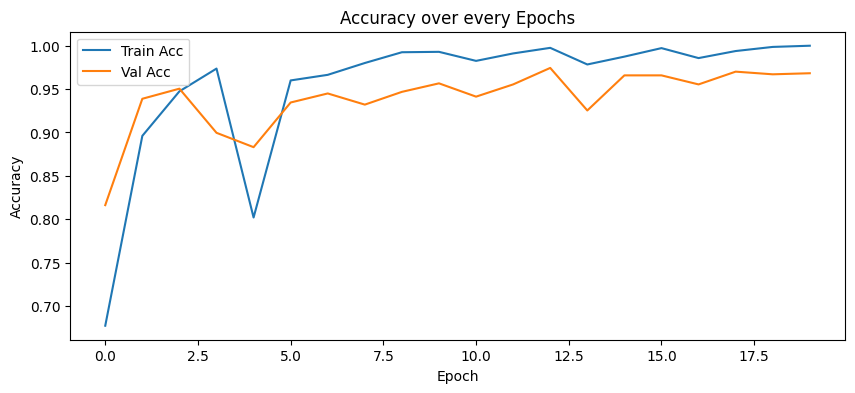

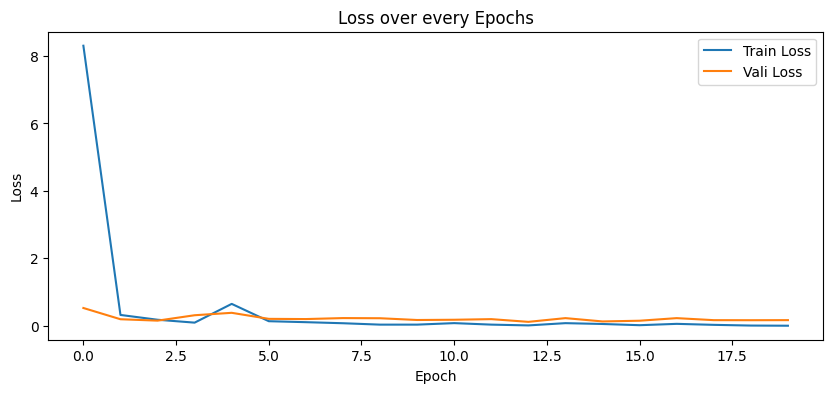

In [ ]:
Trfic_CNN(Trfic_OTZ='adam')

ii) When optimizer is 'adamax'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1473s 7s/step - accuracy: 0.5731 - loss: 62.4008 - val_accuracy: 0.9419 - val_loss: 0.2171
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.9407 - loss: 0.2108 - val_accuracy: 0.9578 - val_loss: 0.1464
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 821s 4s/step - accuracy: 0.9762 - loss: 0.0997 - val_accuracy: 0.9639 - val_loss: 0.1259
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - accuracy: 0.9845 - loss: 0.0642 - val_accuracy: 0.9780 - val_loss: 0.0844
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 835s 4s/step - accuracy: 0.9943 - loss: 0.0344 - val_accuracy: 0.9792 - val_loss: 0.0692
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 833s 4s/step - accuracy: 0.9952 - loss: 0.0291 - val_accuracy: 0.9816 - val_loss: 0.0886
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 820s 4s/step - accuracy: 0.9928 - loss: 0.0317 - val_accuracy: 0.9749 - val_loss: 0.1058
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 854s 4s/step - accuracy: 0.9890 - loss: 0.0433 - val_ac

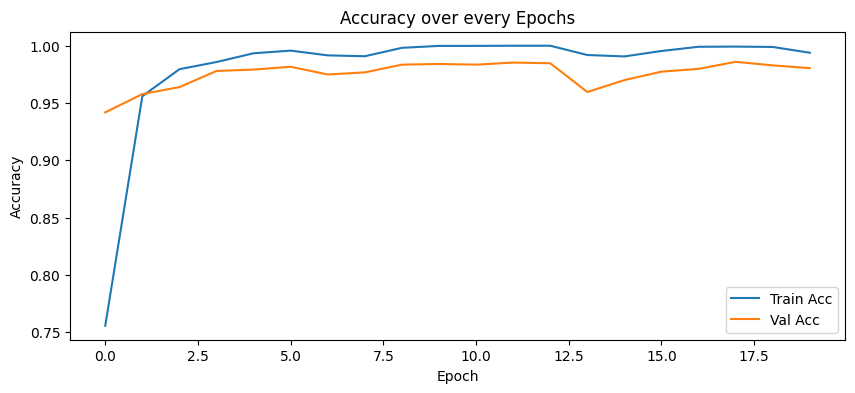

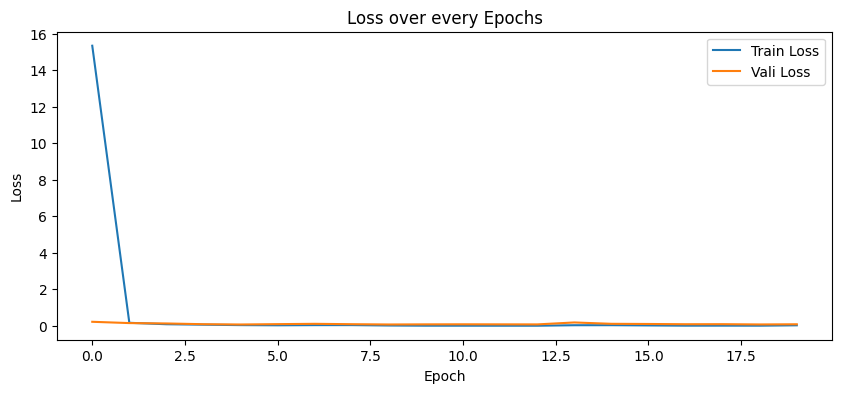

In [ ]:
Trfic_CNN(Trfic_OTZ='adamax')

iii) When optimizer is 'rmsprop'

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 818s 4s/step - accuracy: 0.4458 - loss: 96.9031 - val_accuracy: 0.4412 - val_loss: 3.2205
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.7305 - loss: 1.9762 - val_accuracy: 0.7956 - val_loss: 0.7664
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 858s 4s/step - accuracy: 0.8149 - loss: 1.8930 - val_accuracy: 0.8960 - val_loss: 0.3164
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 816s 4s/step - accuracy: 0.8789 - loss: 0.8632 - val_accuracy: 0.9388 - val_loss: 0.2289
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 775s 4s/step - accuracy: 0.9332 - loss: 0.4134 - val_accuracy: 0.9266 - val_loss: 0.3217
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 838s 4s/step - accuracy: 0.9514 - loss: 0.2609 - val_accuracy: 0.9504 - val_loss: 0.2098
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 869s 4s/step - accuracy: 0.9655 - loss: 0.2850 - val_accuracy: 0.9596 - val_loss: 0.2058
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 0.9629 - loss: 0.2636 - val_acc

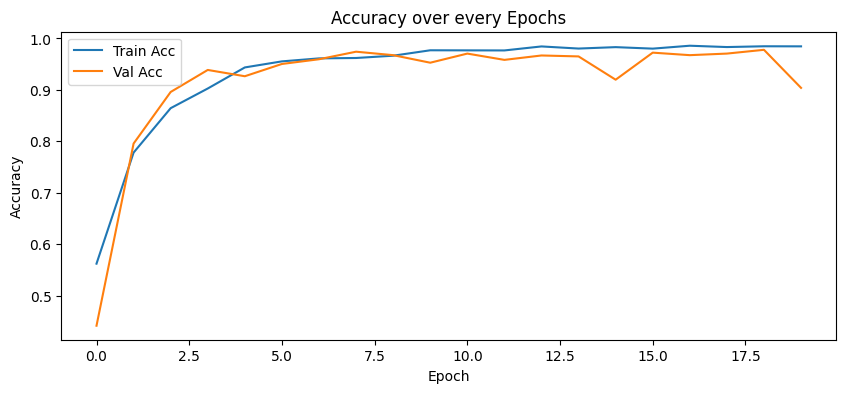

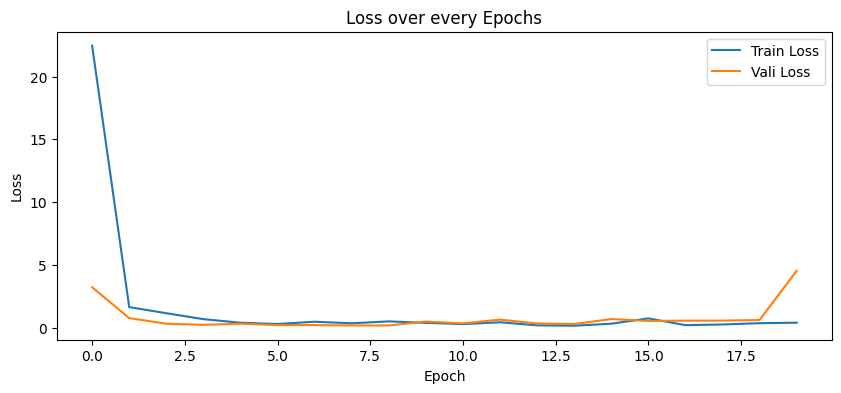

In [ ]:
Trfic_CNN(Trfic_OTZ='rmsprop')